In [28]:
!pip install pandas
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [29]:
import pandas as pd

In [30]:
general_information = pd.read_csv('data/general_information_bkp.csv', low_memory=False)
type_and_level = pd.read_csv('data/type_and_level_bk.csv', low_memory=False)
geographical_facilities = pd.read_csv('data/geographical_facilities_bkp.csv', low_memory=False)
buildings_and_library = pd.read_csv('data/buildings_and_library.csv', low_memory=False)
compliance1 = pd.read_csv('data/compliance_1_bkp.csv', low_memory=False)
compliance2 = pd.read_csv('data/compliance_2_bkp.csv', low_memory=False)
compliance3 = pd.read_csv('data/compliance_3_bkp.csv', low_memory=False)
compliance4 = pd.read_csv('data/compliance_4_bkp.csv', low_memory=False)
divisions = pd.read_csv('data/divisions_bkp.csv', low_memory=False)
districts = pd.read_csv('data/districts_bkp.csv', low_memory=False)
thanas = pd.read_csv('data/thanas_bkp.csv', low_memory=False)
pbgsi_institutions = pd.read_csv('data/pbgsi_7000_ins_bkp.csv', low_memory=False)
institute_type = pd.read_csv('configs/institution_type.csv', low_memory=False)
student_type = pd.read_csv('configs/student_types.csv', low_memory=False)
divisions = pd.read_csv('data/divisions_bkp.csv', low_memory=False)
districts = pd.read_csv('data/districts_bkp.csv', low_memory=False)
thanas = pd.read_csv('data/thanas_bkp.csv', low_memory=False)
approval_status = pd.read_csv('configs/approval_status.csv', low_memory=False)
boards = pd.read_csv('configs/boards.csv', low_memory=False)
boundary_types = pd.read_csv('configs/boundary_type.csv', low_memory=False)
emis_submission_types = pd.read_csv('configs/emis_submission_types.csv', low_memory=False)
fiscal_years = pd.read_csv('configs/fiscal_years.csv', low_memory=False)
geographical_location_types = pd.read_csv('configs/geographical_locations_type.csv', low_memory=False)
highest_levels = pd.read_csv('configs/higest_levels.csv',low_memory=False)
management_type = pd.read_csv('configs/management_types.csv', low_memory=False)
mpo_status = pd.read_csv('configs/mpo_status.csv', low_memory=False)
ownership_types = pd.read_csv('configs/ownership_type.csv', low_memory=False)
pass_rate_types = pd.read_csv('configs/pass_rate_type.csv', low_memory=False)
sexual_harassment_committee_activity_type = pd.read_csv('configs/sexual_harassment_committee_activity_type.csv', low_memory=False)
students_attendance_types = pd.read_csv('configs/students_attendance_type.csv', low_memory=False)
teachers_attendance_types = pd.read_csv('configs/teachers_attendance_type.csv', low_memory=False)
technical_types = pd.read_csv('configs/technical_type.csv', low_memory=False)
ward_type = pd.read_csv('configs/ward_type.csv', low_memory=False)

In [31]:
df_general_information_submitted = general_information[general_information['submitted']==1]

In [32]:
df_merged = pd.merge(df_general_information_submitted, type_and_level, on='eiin', how='inner', suffixes=('', '_type_and_level'))
general_info_institution_type_col_name = df_merged['institution_type'].name
institution_type_name_col = institute_type['institute_type_id'].name
df_merged = pd.merge(df_merged, institute_type, left_on=general_info_institution_type_col_name, right_on=institution_type_name_col, how='inner', suffixes=('', '_institution_type'))
df_merged = pd.merge(df_merged, divisions, left_on='address_division',   right_on='division_id', how='inner', suffixes=('', '_divisions'))
df_merged = pd.merge(df_merged, districts, left_on='address_district',   right_on='district_id', how='inner', suffixes=('', '_districts'))
df_merged = pd.merge(df_merged, thanas, left_on='address_thana',   right_on='thana_id', how='inner', suffixes=('', '_thanas'))
df_merged = pd.merge(df_merged, geographical_facilities, on='eiin', how='inner', suffixes=('', '_geographical_facilities'))
df_merged = pd.merge(df_merged, buildings_and_library, on='eiin', how='inner', suffixes=('', '_buildings_and_library'))
df_merged = pd.merge(df_merged, compliance1, on='eiin', how='inner', suffixes=('','_compliance1'))
df_merged = pd.merge(df_merged, compliance2, on='eiin', how='inner', suffixes=('', '_compliance2'))
df_merged = pd.merge(df_merged, compliance3, on='eiin', how='inner', suffixes=('', '_compliance3'))
df_merged = pd.merge(df_merged, compliance4, on='eiin', how='inner', suffixes=('', '_compliance4'))
df_merged = pd.merge(df_merged, student_type, left_on=df_merged.student_type.name, right_on=student_type.student_type_id, suffixes=('', '_student_type'))

In [33]:
pbgsi_institutions['EIIN'] = pbgsi_institutions['EIIN'].astype(str)

In [34]:
INSTITUTION_TYPES_ORDER = ['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA']

In [35]:
df_merged['generalized_institution_type'] = df_merged['institute_type_name_en']

In [36]:
df_merged['generalized_institution_type'] = df_merged['generalized_institution_type'].replace('COLLEGE', 'SCHOOL AND COLLEGE')

### Table 1: Number of Secondary Institutions Having Management Accountability Grant and refunded the grant by Type of institution
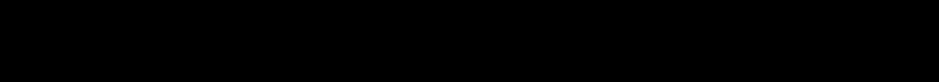
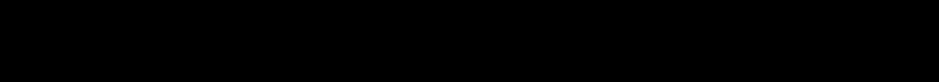
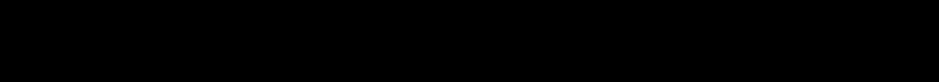

In [37]:
df_merged.head()

,id,institution_name_bangla,institution_name_english,address_village_holding,address_road,address_post_office,address_post_code,[union],address_ward,address_thana,...,books_received_on,sixth_grade_books_provided,seventh_grade_books_provided,eighth_grade_books_provided,ninth_grade_books_provided,tenth_grade_books_provided,student_type_id,student_type_name,student_type_name_en,generalized_institution_type
0,187108,জিয়াডাঙ্গা আহমাদিয়া দাখিল মাদ্রাসা,ZIADANGA AHMADIA DAKHIL MADRASHA,ziadanga,0,Magurahat,7400,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,MADRASHA
1,187111,বেলকুচি বহুমুখী মহিলা ডিগ্রি কলেজ,BELKUCHI BAHUMAUKHI WOMENS COLLEGE,SHERNAGAR,SIRAJGANJ ENAYETPUR ROAD,SHOHAGPUR,6741,NaN,NaN,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,মেয়ে,Girl,SCHOOL AND COLLEGE
2,187112,কালিকাপুর সিদ্দিকীয়া দাখিল মাদ্রাসা,KALIKAPUR SIDDIKIA MADRASHA,KALIKAPUR,BALIADANGA TO TALTOLA ROAD,KALIKAPUR,9440,NaN,NaN,263.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,MADRASHA
3,187114,মিরপুর নিম্ন মাধ্যমিক বিদ্যানিকেতন।,MIRPUR JUNIOR SECONDARY BIDDYA NIKETON,819 (Sultanpur),Beside Mirpur Football Field,Mirpur,7030,NaN,NaN,356.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,SCHOOL
4,187115,মোশারফ হোসেন প্রধান কলেজ,MOSHARAF HOSSAIN PRODHAN COLLEGE,AZIZPUR,Azizpur,Kawamari,5540,NaN,NaN,431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,সহশিক্ষা,Co-education,SCHOOL AND COLLEGE


In [38]:
column_generalized_institution_type = df_merged['generalized_institution_type'].name
df_total_institution_type_with_count = (
    df_merged[df_merged['generalized_institution_type'].isin(['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA'])]
    .groupby(column_generalized_institution_type)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='total')
)

In [39]:
df_total_institution_type_with_count.head()

,generalized_institution_type,total
0,SCHOOL,25333
1,SCHOOL AND COLLEGE,6196
2,MADRASHA,11490


In [40]:
df_pbgsi_institutions = df_merged[df_merged['pbgsi_scheme']==1]

In [41]:
df_pbgsi_institutions = pd.merge(df_pbgsi_institutions, pbgsi_institutions, left_on="eiin", right_on="EIIN", how='inner')

In [42]:
df_total_pbgsi_institution_type_with_count = (
    df_pbgsi_institutions[ df_pbgsi_institutions['generalized_institution_type'].isin(['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA'])]
    .groupby(column_generalized_institution_type)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='total')
)

In [43]:
df_total_institution_type_with_count.head()

,generalized_institution_type,total
0,SCHOOL,25333
1,SCHOOL AND COLLEGE,6196
2,MADRASHA,11490


In [44]:
df_total_pbgsi_refunded_institution_type_with_count = (
    df_pbgsi_institutions[df_pbgsi_institutions['was_returned']==1 & df_pbgsi_institutions['generalized_institution_type'].isin(['SCHOOL', 'SCHOOL AND COLLEGE', 'MADRASHA'])]
    .groupby(column_generalized_institution_type)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='total')
)

In [45]:
df_total_pbgsi_institution_type_with_count.head()

,generalized_institution_type,total
0,SCHOOL,5003
1,SCHOOL AND COLLEGE,505
2,MADRASHA,1807


In [46]:
print(df_total_institution_type_with_count['generalized_institution_type'].name)

generalized_institution_type


In [47]:
generalized_institution_type_col_name = df_total_institution_type_with_count['generalized_institution_type'].name

df_institution_count = pd.merge(df_total_institution_type_with_count, df_total_pbgsi_institution_type_with_count, on=generalized_institution_type_col_name, how='left', suffixes=('', '_pbgsi'))

In [48]:
df_institution_count = pd.merge(df_institution_count, df_total_pbgsi_refunded_institution_type_with_count, on=generalized_institution_type_col_name, how='left', suffixes=('', '_refunded'))

In [49]:
df_institution_count.head()

,generalized_institution_type,total,total_pbgsi,total_refunded
0,SCHOOL,25333,5003,122
1,SCHOOL AND COLLEGE,6196,505,16
2,MADRASHA,11490,1807,30


In [50]:
df_institution_count['pbgsi_percentage'] = round((df_institution_count.total_pbgsi / df_institution_count.total) * 100, 2)
df_institution_count['refund_percentage'] = round((df_institution_count.total_refunded / df_institution_count.total_pbgsi) * 100, 2)

In [51]:
df_institution_count.head()

,generalized_institution_type,total,total_pbgsi,total_refunded,pbgsi_percentage,refund_percentage
0,SCHOOL,25333,5003,122,19.75,2.44
1,SCHOOL AND COLLEGE,6196,505,16,8.15,3.17
2,MADRASHA,11490,1807,30,15.73,1.66


In [52]:
total_institutions_sum = df_institution_count['total'].sum()
total_pbgsi_sum = df_institution_count['total_pbgsi'].sum()
total_refund_sum = df_institution_count['total_refunded'].sum()

total_pbgsi_percentage = round((total_pbgsi_sum / total_institutions_sum)*100, 2)
total_refund_percentage = round((total_refund_sum / total_pbgsi_sum) * 100, 2)

df_institution_count.loc[len(df_institution_count)] = [
    'Total',
    total_institutions_sum,
    total_pbgsi_sum,
    total_refund_sum,
    total_pbgsi_percentage,
    total_refund_percentage
]

df_institution_count.head()

,generalized_institution_type,total,total_pbgsi,total_refunded,pbgsi_percentage,refund_percentage
0,SCHOOL,25333,5003,122,19.75,2.44
1,SCHOOL AND COLLEGE,6196,505,16,8.15,3.17
2,MADRASHA,11490,1807,30,15.73,1.66
3,Total,43019,7315,168,17.00,2.30


In [53]:
selected_columns = [
    df_institution_count.generalized_institution_type.name,
    df_institution_count.total_pbgsi.name,
    df_institution_count.pbgsi_percentage.name,
    df_institution_count.total_refunded.name,
    df_institution_count.refund_percentage.name
]

renamed_columns = {
    'generalized_institution_type': 'Type of institution',
    'total_pbgsi': 'Number of pbgsi institute',
    'pbgsi_percentage': 'pbgsi percentage',
    'total_refunded': 'Number of refunded institute',
    'refund_percentage': 'refund percentage'
}

df_export = df_institution_count[selected_columns].rename(columns=renamed_columns)
df_export.to_excel('output/table1_pbgsi.xlsx', index=False)

### Table 2. Number of Secondary Institutions Having Management Accountability Grant by Type of institution and Gender Composition

In [54]:
STUDENT_TYPES = ['Boy', 'Girl', 'Co-education']

In [57]:
df_institution_type_count_for_boys = (
    df_pbgsi_institutions[df_pbgsi_institutions[' student_type_name_en']=='Boy']
    .groupby(generalized_institution_type_col_name)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='boys')
)

In [59]:
df_institution_type_count_for_girls = (
    df_pbgsi_institutions[df_pbgsi_institutions[' student_type_name_en']=='Girl']
    .groupby(generalized_institution_type_col_name)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='girls')
)

In [61]:
df_institution_type_count_for_coeducation = (
    df_pbgsi_institutions[df_pbgsi_institutions[' student_type_name_en']=='Co-education']
    .groupby(generalized_institution_type_col_name)
    .size()
    .reindex(INSTITUTION_TYPES_ORDER)
    .reset_index(name='co_education')
)